<a href="https://colab.research.google.com/github/jessejk484/Jashwanthkalyan_INFO5731_SPRING2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [4]:
# Write your code here
import pandas as pd
import time
import nltk
import re
from google.colab import files
uploaded = files.upload()






Saving user_reviews.csv to user_reviews.csv


In [75]:

df=pd.read_csv('user_reviews.csv')
df.columns = ['' , 'User Review']
df.head()

,,User Review
0,0,"For reference, here are my ratings for the oth..."
1,1,"Going to watch ""future best animated picture w..."
2,2,'Minions: The Rise of Gru' follows 11 3/4 year...
3,3,I'm not sure why this movie doesn't have a hig...
4,4,Its a fun movie. Minion scenes are more than G...


In [76]:
import string
import nltk
from nltk.corpus import stopwords


rev = []
for i in df['User Review']:
  sub = str(i)
  x = sub.replace(sub[:0],"").replace("<br/><br/>","").replace("</div>", "").replace("\n", " ")
  rev.append(x.lower())


def lower_review(review):  
  low = " ".join(x.lower() for x in review.split())
  return low



def Punctuation_removal(review):
    punctuation = string.punctuation
    lis = []
    se=[]
    for sentence in review:
      if sentence in punctuation:
        pass     
      else:
        se.append(sentence)  
    # print("".join(se))
    return "".join(se)
      

df["User Reviews"] = rev
df['User Reviews'].head()
df = pd.DataFrame({'User Reviews': df['User Review']})
#copying data to csv file
df.to_csv('user_reviews.csv')
df.head()

,User Reviews
0,"For reference, here are my ratings for the oth..."
1,"Going to watch ""future best animated picture w..."
2,'Minions: The Rise of Gru' follows 11 3/4 year...
3,I'm not sure why this movie doesn't have a hig...
4,Its a fun movie. Minion scenes are more than G...


In [77]:
import nltk
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('punkt')
def Tokenize(review):
  reviews = []
  for i in review:
    nltk_tokens = nltk.word_tokenize(i)
    reviews.append(nltk_tokens)
  return reviews

def remove_number(review):
  return re.sub(r'[0-9]', '', review)

def Stemming_Lemmetize(review):
  lem_reviews = []
  for i in review:
    len_sen=[]
    for j in i:
      len_sen.append(ps.stem(lemmatizer.lemmatize(j)))
    lem_reviews.append(len_sen)
  return lem_reviews

def stop_words_removal(sl):
  stop_word = stopwords.words('english')
  # print(sl)
  lem_reviews = []
  for i in sl.split():
    if i not in stop_word:
      lem_reviews.append(i)

  return " ".join(lem_reviews)
  
df["Changed Reviews"] = df["User Reviews"].replace("\n","")
functions = [Punctuation_removal, remove_number, lower_review, stop_words_removal]
for op in functions:
  df["Changed Reviews"] = df["Changed Reviews"].apply(op)
print(df.shape)
# df.to_csv("After cleaning data.csv")

df["Edited Reviews"] = df["Changed Reviews"].apply(stop_words_removal)
df.head()
# words = Stemming_Lemmetize(Tokenize(df["User Reviews"]))
# aftercleaning = [x for x in words if x != []]
# iterations = list(itertools.chain.from_iterable(aftercleaning))

(23, 2)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,User Reviews,Changed Reviews,Edited Reviews
0,"For reference, here are my ratings for the oth...",reference ratings movies despicable stars desp...,reference ratings movies despicable stars desp...
1,"Going to watch ""future best animated picture w...",going watch future best animated picture winne...,going watch future best animated picture winne...
2,'Minions: The Rise of Gru' follows 11 3/4 year...,minions rise gru follows year old gru voiced s...,minions rise gru follows year old gru voiced s...
3,I'm not sure why this movie doesn't have a hig...,im sure movie doesnt higher rating found reall...,im sure movie doesnt higher rating found reall...
4,Its a fun movie. Minion scenes are more than G...,fun movie minion scenes gru thankfully chemist...,fun movie minion scenes gru thankfully chemist...


In [78]:
from textblob import Word
import nltk
nltk.download('wordnet')
# Lemmatization
df['cleaned Reviews'] = df['Changed Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,User Reviews,Changed Reviews,Edited Reviews,cleaned Reviews
0,"For reference, here are my ratings for the oth...",reference ratings movies despicable stars desp...,reference ratings movies despicable stars desp...,reference rating movie despicable star despica...
1,"Going to watch ""future best animated picture w...",going watch future best animated picture winne...,going watch future best animated picture winne...,going watch future best animated picture winne...
2,'Minions: The Rise of Gru' follows 11 3/4 year...,minions rise gru follows year old gru voiced s...,minions rise gru follows year old gru voiced s...,minion rise gru follows year old gru voiced st...
3,I'm not sure why this movie doesn't have a hig...,im sure movie doesnt higher rating found reall...,im sure movie doesnt higher rating found reall...,im sure movie doesnt higher rating found reall...
4,Its a fun movie. Minion scenes are more than G...,fun movie minion scenes gru thankfully chemist...,fun movie minion scenes gru thankfully chemist...,fun movie minion scene gru thankfully chemistr...


In [79]:
from nltk.stem import PorterStemmer # stemming
st = PorterStemmer()
df['cleaned Reviews'] = df['cleaned Reviews'].apply(lambda x: "".join([st.stem(word) for word in x]))
df.head()

,User Reviews,Changed Reviews,Edited Reviews,cleaned Reviews
0,"For reference, here are my ratings for the oth...",reference ratings movies despicable stars desp...,reference ratings movies despicable stars desp...,reference rating movie despicable star despica...
1,"Going to watch ""future best animated picture w...",going watch future best animated picture winne...,going watch future best animated picture winne...,going watch future best animated picture winne...
2,'Minions: The Rise of Gru' follows 11 3/4 year...,minions rise gru follows year old gru voiced s...,minions rise gru follows year old gru voiced s...,minion rise gru follows year old gru voiced st...
3,I'm not sure why this movie doesn't have a hig...,im sure movie doesnt higher rating found reall...,im sure movie doesnt higher rating found reall...,im sure movie doesnt higher rating found reall...
4,Its a fun movie. Minion scenes are more than G...,fun movie minion scenes gru thankfully chemist...,fun movie minion scenes gru thankfully chemist...,fun movie minion scene gru thankfully chemistr...


In [80]:
from textblob import TextBlob
def get_N_grams(df, N):
  return [TextBlob(df.loc[x, 'cleaned Reviews']).ngrams(N) for x in range(len(df))]

def get_freq_grams(tot_data):
  count = {}
  for sub_data in tot_data:
    for data in sub_data:
      tup_dt = tuple(data)
      count[tup_dt] = count.get(tup_dt, 0) + 1
  return count

trigrams = get_N_grams(df, 3)

In [81]:
trig_freq = get_freq_grams(trigrams)
trig_freq

{('reference', 'rating', 'movie'): 1,
 ('rating', 'movie', 'despicable'): 1,
 ('movie', 'despicable', 'star'): 1,
 ('despicable', 'star', 'despicable'): 1,
 ('star', 'despicable', 'star'): 1,
 ('despicable', 'star', 'minion'): 1,
 ('star', 'minion', 'star'): 1,
 ('minion', 'star', 'despicable'): 1,
 ('star', 'despicable', 'starsi'): 1,
 ('despicable', 'starsi', 'pleasantly'): 1,
 ('starsi', 'pleasantly', 'surprised'): 1,
 ('pleasantly', 'surprised', 'best'): 1,
 ('surprised', 'best', 'one'): 1,
 ('best', 'one', 'since'): 1,
 ('one', 'since', 'original'): 1,
 ('since', 'original', 'fire'): 1,
 ('original', 'fire', 'cylinder'): 1,
 ('fire', 'cylinder', 'comedy'): 1,
 ('cylinder', 'comedy', 'story'): 1,
 ('comedy', 'story', 'visuals'): 1,
 ('story', 'visuals', 'action'): 1,
 ('visuals', 'action', 'scene'): 1,
 ('action', 'scene', 'start'): 1,
 ('scene', 'start', 'fast'): 1,
 ('start', 'fast', 'never'): 1,
 ('fast', 'never', 'let'): 1,
 ('never', 'let', 'movie'): 1,
 ('let', 'movie', 'fly'

In [82]:
# 2.Bigrams Frequency
def get_words_count(tot_data):
  count_dt = {}
  for sub_data in tot_data:
    for x in sub_data:
      count_dt[x] = count_dt.get(x, 0) + 1
  
  return count_dt

# prob = count(w2 w1)/count(w2)
def cal_prob(tot_data, word_count):
  prob_val = {}
  for sub_data, gram_ct in tot_data.items():
    val = gram_ct/word_count[sub_data[0]]
    prob_val[sub_data] = val
  return prob_val

bigrams = get_N_grams(df, 2)
bigr_freq = get_freq_grams(bigrams)
words_count = get_words_count(bigr_freq)
prob_values = cal_prob(bigr_freq, words_count)
prob_values

{('reference', 'rating'): 0.05,
 ('rating', 'movie'): 0.2,
 ('movie', 'despicable'): 0.026785714285714284,
 ('despicable', 'star'): 0.07692307692307693,
 ('star', 'despicable'): 0.25,
 ('star', 'minion'): 0.125,
 ('minion', 'star'): 0.01,
 ('despicable', 'starsi'): 0.038461538461538464,
 ('starsi', 'pleasantly'): 0.5,
 ('pleasantly', 'surprised'): 0.5,
 ('surprised', 'best'): 0.5,
 ('best', 'one'): 0.05,
 ('one', 'since'): 0.025,
 ('since', 'original'): 0.16666666666666666,
 ('original', 'fire'): 0.07692307692307693,
 ('fire', 'cylinder'): 0.5,
 ('cylinder', 'comedy'): 0.5,
 ('comedy', 'story'): 0.125,
 ('story', 'visuals'): 0.030303030303030304,
 ('visuals', 'action'): 0.18181818181818182,
 ('action', 'scene'): 0.18181818181818182,
 ('scene', 'start'): 0.05555555555555555,
 ('start', 'fast'): 0.1,
 ('fast', 'never'): 0.5,
 ('never', 'let'): 0.125,
 ('let', 'movie'): 0.16666666666666666,
 ('movie', 'fly'): 0.008928571428571428,
 ('fly', 'ton'): 0.5,
 ('ton', 'great'): 0.5,
 ('great', '

In [84]:
# 3. Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews 
from ast import Continue
nltk.download('averaged_perceptron_tagger')
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('brown')

text_list = list(df["cleaned Reviews"])

words_count = ''
for text in text_list:  
    words_count += text
noun_phrases = []
frequency = []
for line in text_list:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in text_list:
    if words_count.count(word) == 0:
      continue
    noun_phrases_freq.append(line.count(word) / words_count.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,despicable star,despicable star minion star,despicable starsi,original fire cylinder comedy story visuals action scene,movie fly ton,great new charactersthis movie,tear scene minion,memorable moment story,action scene,pretty epic,...,grus weariness adult world challenge,reread credit,pretty heavyduty voice actor,line arnett steve coogan russell brand,whole filmthe kid,afternoon didnt ring meps,possible way review,film time lifechanger,marriage stupid internet troll joke pr department studio,average review score hmm
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
for x in range(len(noun_phrases_df)):
  noun_phrases_df.loc[x, 'Review'] = f"Review-{(x+1)}"
noun_phrases_df.index = list(noun_phrases_df['Review'])
noun_phrases_df.drop(columns=['Review'], inplace=True)
noun_phrases_df.head()


,despicable star,despicable star minion star,despicable starsi,original fire cylinder comedy story visuals action scene,movie fly ton,great new charactersthis movie,tear scene minion,memorable moment story,action scene,pretty epic,...,grus weariness adult world challenge,reread credit,pretty heavyduty voice actor,line arnett steve coogan russell brand,whole filmthe kid,afternoon didnt ring meps,possible way review,film time lifechanger,marriage stupid internet troll joke pr department studio,average review score hmm
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**




(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [87]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Changed Reviews"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf






,token,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,people,0.0,0.0,0.0,0.000000,0.0,0.15497,0.000000,0.028095,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.028593,0.000000,0.000000
1,save,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.048333,0.000000,0.000000,0.044658
2,quite,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.007826,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,used,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.007826,0.0,0.0,0.000000,0.000000,0.025561,0.044658
4,number,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.025561,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,right,0.0,0.0,0.0,0.000000,0.0,0.00000,0.021387,0.000000,0.000000,...,0.0,0.0,0.0,0.007826,0.0,0.0,0.000000,0.000000,0.025561,0.000000
1352,alternative,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.033404,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1353,clearest,0.0,0.0,0.0,0.037443,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1354,goal,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.007826,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [88]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [89]:
query_sentence = 'The perfect portrait of a decline to insanity" & Joaquin Phoenix portrays this flawlessly in a performance of a lifetime. Choreographed impeccably by Todd Phillips & is nothing short of breathtaking. The cinematography & backdrop ideology of such an original film for such a complex character is only complimented by the superb soundtrack & acting. A hauntingly beautiful film & A Definate 10/10. Edit: Bring on part 2 plssssss!. We all want it!.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}  

In [90]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [92]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

similarity_list = []
for sentence in text_list:
  Y_set = set(word_tokenize(sentence))
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['cleaned Reviews'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,reference rating movie despicable star despica...,0.036298
1,going watch future best animated picture winne...,0.000000
2,minion rise gru follows year old gru voiced st...,0.016087
3,im sure movie doesnt higher rating found reall...,0.056490
4,fun movie minion scene gru thankfully chemistr...,0.031435
5,movie many reference sixty seventy dont think ...,0.000000
6,world gru powerful villain anyone ever seen qu...,0.021564
7,may feel total like franchise running steam le...,0.025194
8,latest illumination studio another adventure a...,0.026064
9,reason rise gru feel like let lack creativity ...,0.028916


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [94]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np

sentences = df['cleaned Reviews'].values.tolist()[0:10]
sent_tokens = [word_tokenize(sent) for sent in sentences]
model = Word2Vec(sent_tokens, vector_size=500, window=5, min_count=1, workers=4)

# Get the word vectors and corresponding words from the model
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Use PCA to reduce the dimensionality of the word vectors to 300 dimensions
pca = PCA(n_components=300)
word_vectors_300d = pca.fit_transform(word_vectors)

# Store the reduced word vectors back into the Word2Vec model
model.wv.vectors = word_vectors_300d

# Use the updated Word2Vec model to access the word embeddings as usual
model.wv.key_to_index['minion']

0

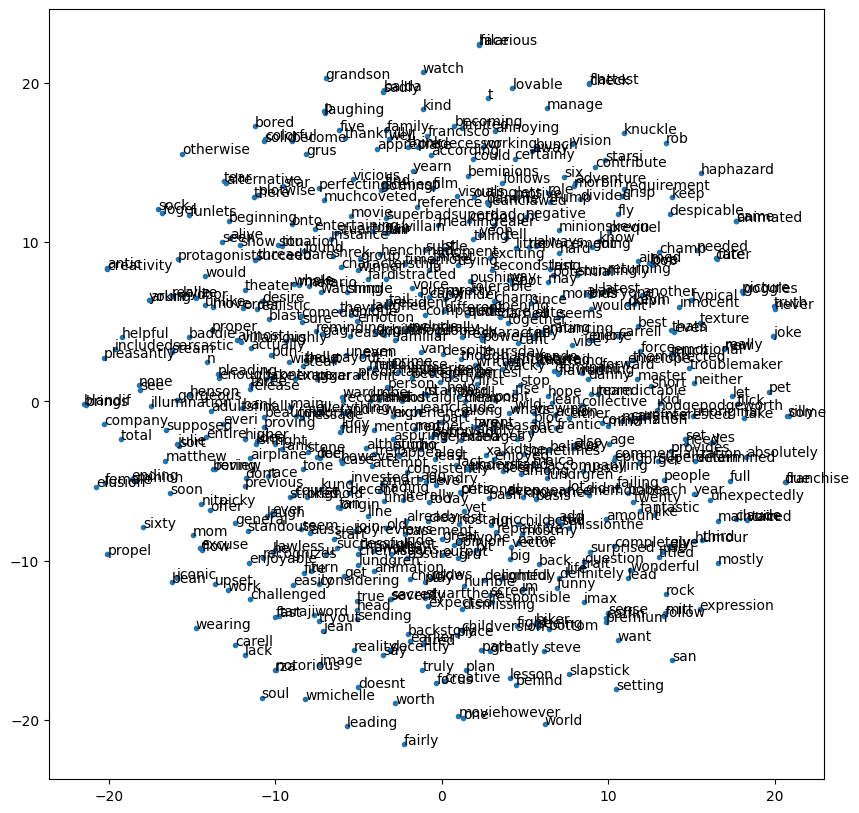

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get the word vectors and corresponding words from the model
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Reduce the dimensionality of the word vectors to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the 2D embeddings
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [96]:
# The GitHub link of your final csv file



# Link: 




In [103]:
# from textblob import TextBlob
# df['User Reviews'][:5].apply(lambda x: TextBlob(x).sentiment)

In [104]:
# df['sentiment'] = df['User Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
# df[['User Reviews','sentiment']].head()

In [105]:
#df

In [106]:
# import nltk
# from nltk.corpus import movie_reviews
# import random

# nltk.download('movie_reviews')

# documents = [(list(movie_reviews.words(fileid)), category)
#               for category in movie_reviews.categories()
#               for fileid in movie_reviews.fileids(category)]

# random.shuffle(documents)

In [107]:
# all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
# word_features = list(all_words)[:2000]

# def document_features(document):
#     document_words = set(document)
#     features = {}
#     for word in word_features:
#         features['contains({})'.format(word)] = (word in document_words)
#     return features

In [108]:
# from textblob import TextBlob

# def get_sentiment(text):
#     blob = TextBlob(text)
#     polarity = blob.sentiment.polarity
#     if polarity > 0:
#         return "positive"
#     elif polarity < 0:
#         return "negative"
#     else:
#         return "neutral"

In [113]:
df_new = pd.DataFrame()
df_new['User Review'] = list(range(len(df)))
df_new['cleaned_txt'] = df['cleaned Reviews']

def F(x):
  if x>0.15:
    return "Positive"
  elif x<0.15:
    return "Negative"
  return "Neutral"

df_new['Sentiment'] = df_new['cleaned_txt'].apply(lambda x: TextBlob(x).sentiment)
df_new['Sentiment'] = df_new['Sentiment'].apply(F)

TypeError: ignored